<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/PyTorch/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch

In [ ]:
%%bash
pip install --no-cache-dir -qU \
    torchmetrics

## Introduction

### Tensors

In [1]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

a = torch.tensor([
    [2, 3, 5],
    [1, 2, 9]
])
if torch.cuda.is_available():
    a = a.cuda()
print(a.shape)

a = np.array([
    [2, 3, 5],
    [1, 2, 9]
])
a = torch.tensor(a)
if torch.cuda.is_available():
    a = a.cuda()
print(a.cpu().numpy())

a = torch.rand(size=(2, 2))
b = torch.rand(size=(2, 2))
if torch.cuda.is_available():
    a = a.cuda()
    b = b.cuda()

# Dot product
print(torch.matmul(input=a, other=b))
# Element-wise multiplication
print(a * b)

torch.Size([2, 3])
[[2 3 5]
 [1 2 9]]
tensor([[0.5792, 1.2563],
        [0.3956, 0.9914]], device='cuda:0')
tensor([[0.3445, 0.5498],
        [0.0982, 0.7613]], device='cuda:0')


In [ ]:
import torch
torch.manual_seed(seed=42)

# Create a matrix of ones with shape 3 by 3
a = torch.ones(size=(3, 3))
# Create an identity matrix with shape 3 by 3
b = torch.eye(n=3)

if torch.cuda.is_available():
    a = a.cuda()
    b = b.cuda()

# Matrix multiplication of a with b
c = torch.matmul(input=a, other=b)
print(c)

# Element-wise multiplication of a with b
c = a * b
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')


### Forward propagation

In [ ]:
import torch
torch.manual_seed(seed=42)

# Initialize tensors x, y and z
x = torch.rand(size=(1000, 1000))
y = torch.rand(size=(1000, 1000))
z = torch.rand(size=(1000, 1000))

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = z.cuda()

# Multiply tensors x and y
q = torch.matmul(input=x, other=y)
# Element-wise multiply tensors z with q
f = z * q
mean_f = torch.mean(input=f)
print(mean_f)
# Calculate the gradients
mean_f.backward()

tensor(125.1406, device='cuda:0')


### Backpropagation

In [ ]:
import torch
torch.manual_seed(seed=42)

# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

# Set q to sum of x and y
q = x + y
# Set f to product of q with z
f = q * z
# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of z is:", z.grad)
print("Gradient of y is:", y.grad)
print("Gradient of x is:", x.grad)

Gradient of z is: tensor(1.)
Gradient of y is: tensor(5.)
Gradient of x is: tensor(5.)


### Neural networks

In [ ]:
import torch
torch.manual_seed(seed=42)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=784, out_features=200)
        self.fc2 = torch.nn.Linear(in_features=200, out_features=10)

    def forward(self, x):
        # use the instantiated layers and return x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

input_layer = torch.rand(784)
net = Net()

if torch.cuda.is_available():
    input_layer = input_layer.cuda()
    net = net.cuda()

result = net(input_layer)
print("Result:", result)

Result: tensor([-0.1113, -0.0151,  0.1005,  0.2801,  0.2317, -0.1189, -0.3775,  0.0440,
         0.3325, -0.1394], device='cuda:0', grad_fn=<ViewBackward0>)


## Artificial Neural Networks

### Activation functions

In [7]:
import torch
torch.manual_seed(seed=42)

input_layer = torch.tensor([[0.0401, -0.9005,  0.0397, -0.0876]])
weight_1 = torch.randn(size=(4, 4))
weight_2 = torch.randn(size=(4, 4))
weight_3 = torch.randn(size=(4, 4))

if torch.cuda.is_available():
    input_layer = input_layer.cuda()
    weight_1 = weight_1.cuda()
    weight_2 = weight_2.cuda()
    weight_3 = weight_3.cuda()

# Instantiate non-linearity
relu = torch.nn.ReLU()

# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(
    torch.matmul(input=input_layer, other=weight_1)
)
hidden_2_activated = relu(
    torch.matmul(input=hidden_1_activated, other=weight_2)
)
print(torch.matmul(input=hidden_2_activated, other=weight_3))

# Apply non-linearity to the product of first two weights.
weight_composed_1_activated = relu(
    torch.matmul(input=weight_1, other=weight_2)
)
# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(input=weight_composed_1_activated, other=weight_3)
# Multiply input_layer with weight
print(torch.matmul(input=input_layer, other=weight))

tensor([[-5.0533,  7.3178, -4.4011, -3.3757]], device='cuda:0')
tensor([[ 2.4246,  2.0822,  0.2086, -3.6637]], device='cuda:0')


### Loss function

In [11]:
import torch
torch.manual_seed(seed=42)

# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

if torch.cuda.is_available():
    logits = logits.cuda()
    ground_truth = ground_truth.cuda()

# Instantiate cross entropy loss
criterion = torch.nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(input=logits, target=ground_truth)
print(loss)

tensor(0.0117, device='cuda:0')


### Dataset

Train dataset shape: torch.Size([60000, 28, 28]) 
Test dataset shape: torch.Size([10000, 28, 28])
Train dataset targets: tensor([5, 0, 4,  ..., 5, 6, 8]) 
Test dataset targets: tensor([7, 2, 1,  ..., 4, 5, 6])
Train dataset batch size: 32 
Test dataset batch size: 32


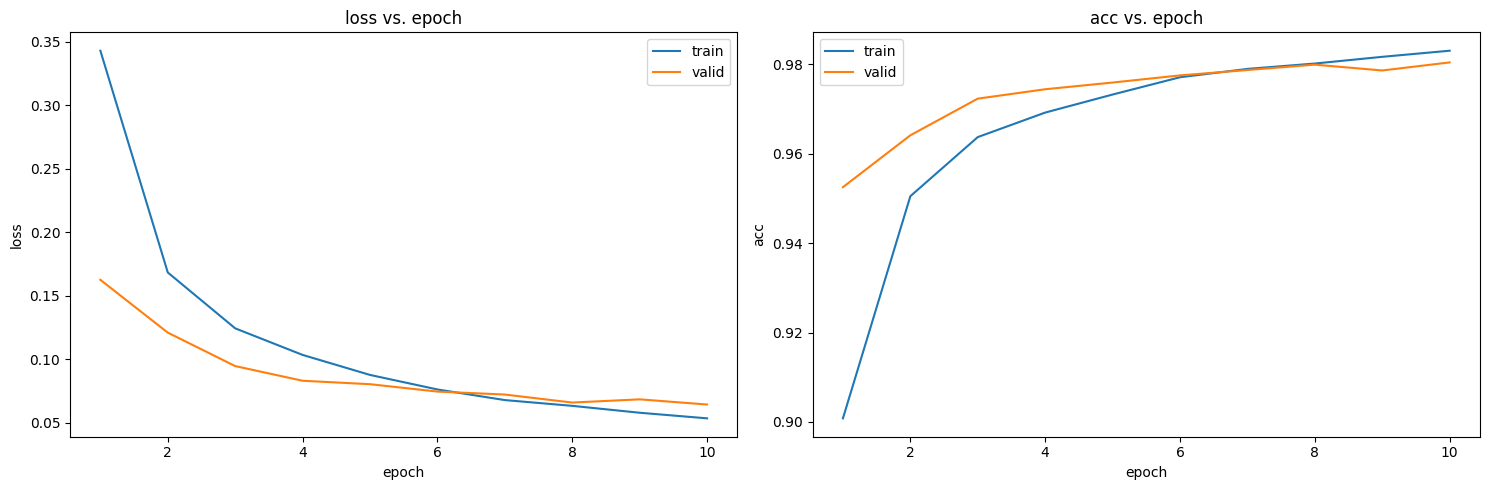

In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
torch.manual_seed(seed=42)
import torchvision
import torchmetrics

# Transform the data to torch tensors and normalize it
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.1307, std=0.3081)
])
# Prepare training set and testing set
trainset = torchvision.datasets.MNIST(root='./data',
    train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data',
    train=False, download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(dataset=testset,
    batch_size=32, shuffle=False, num_workers=2)

# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.data.shape
testset_shape = testloader.dataset.data.shape
# Print the computed shapes
print("Train dataset shape:", trainset_shape,
    "\nTest dataset shape:", testset_shape)

# Compute the targets of the training set and testing set
trainset_targets = trainloader.dataset.targets
testset_targets = testloader.dataset.targets
# Print the computed shapes
print("Train dataset targets:", trainset_targets,
    "\nTest dataset targets:", testset_targets)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size
# Print sizes of the minibatch
print("Train dataset batch size:", trainset_batchsize,
    "\nTest dataset batch size:", testset_batchsize)

# Define the class Net
class Net(torch.nn.Module):
    def __init__(self):
    	# Define all the parameters of the net
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=28*28*1, out_features=200)
        self.dropout = torch.nn.Dropout(p=0.3)
        self.fc2 = torch.nn.Linear(in_features=200, out_features=10)

    def forward(self, x):
    	# Do the forward pass
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the network, the Adam optimizer and Cross-Entropy loss function
model = Net()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
    lr=3e-4, weight_decay=1e-4)
# Create accuracy metric
acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)
if torch.cuda.is_available():
    model = model.cuda()
    acc = acc.cuda()

history = {
    'train_loss': [],
    'train_acc': [],
    'valid_loss': [],
    'valid_acc': []
}

# Loop over the dataset multiple times
for epoch in range(10):
    train_loss = 0.0
    for data in trainloader:
        # Get the inputs
        features, target = data
        features = features.view(-1, 28*28)
        if torch.cuda.is_available():
            features = features.cuda()
            target = target.cuda()
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Complete a forward pass
        preds = model(features)
        # Calculate accuracy over the batch
        acc(preds=preds, target=target)
        # Compute the loss, gradients and change the weights
        loss = criterion(input=preds, target=target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    # Calculate the mean loss value
    train_loss = train_loss / len(trainloader)
    # Calculate accuracy over the whole epoch
    train_acc = acc.compute().item()
    # Reset the metric
    acc.reset()

    valid_loss = 0.0
    # Set the model in eval mode
    model.eval()
    with torch.no_grad():
        for data in testloader:
            features, target = data
            # Put each image into a vector
            features = features.view(-1, 28*28)
            if torch.cuda.is_available():
                features = features.cuda()
                target = target.cuda()
            # Do the forward pass and get the predictions
            preds = model(features)
            # Calculate accuracy over the batch
            acc(preds=preds, target=target)
            # Compute the loss
            loss = criterion(input=preds, target=target)
            valid_loss += loss.item()
    # Calculate the mean loss value
    valid_loss = valid_loss / len(testloader)
    # Calculate accuracy over the whole epoch
    valid_acc = acc.compute().item()
    # Reset the metric
    acc.reset()
    # Set the model back to training mode
    model.train()

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['valid_loss'].append(valid_loss)
    history['valid_acc'].append(valid_acc)

df_history = pd.DataFrame(history)
metrics = ['loss', 'acc']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=f'train_{metric}')
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'valid_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

## Convolutional Neural Networks (CNNs)

### Convolution operator

In [ ]:
import torch
torch.manual_seed(seed=42)

# Create 10 random images of shape (1, 28, 28)
images = torch.rand(size=(10, 1, 28, 28))

# Build 6 conv. filters
conv_filters = torch.nn.Conv2d(in_channels=1, out_channels=6,
    kernel_size=(3, 3), stride=1, padding=1)

if torch.cuda.is_available():
    images = images.cuda()
    conv_filters = conv_filters.cuda()

# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

# Create 6 filters
filters = torch.rand(size=(6, 1, 3, 3))

if torch.cuda.is_available():
    filters = filters.cuda()

# Convolve the image with the filters
output_feature = torch.nn.functional.conv2d(input=images,
    weight=filters, stride=1, padding=1)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])
torch.Size([10, 6, 28, 28])


### Pooling operators

In [ ]:
import torch
torch.manual_seed(seed=0)

im = torch.tensor([[[
    [ 8.,  1.,  2.,  5.,  3.,  1.],
    [ 6.,  0.,  0., -5.,  7.,  9.],
    [ 1.,  9., -1., -2.,  2.,  6.],
    [ 0.,  4.,  2., -3.,  4.,  3.],
    [ 2., -1.,  4., -1., -2.,  3.],
    [ 2., -4.,  5.,  9., -7.,  8.]]]
])
if torch.cuda.is_available():
    im = im.cuda()
print(f"Image size: {im.shape}")
# Build a pooling operator with size `2`.
max_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))
if torch.cuda.is_available():
    max_pooling = max_pooling.cuda()

# Apply the pooling operator
output_feature = max_pooling(im)
# print the results
print(output_feature)
# Use pooling operator in the image
output_feature_F = torch.nn.functional.max_pool2d(
    input=im, kernel_size=(2, 2))
# print the results
print(output_feature_F)

# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(kernel_size=(2, 2))
if torch.cuda.is_available():
    avg_pooling = avg_pooling.cuda()

# Apply the pooling operator
output_feature = avg_pooling(im)
# print the results
print(output_feature)

# Use pooling operator in the image
output_feature_F = torch.nn.functional.avg_pool2d(
    input=im, kernel_size=(2, 2))
# print the results
print(output_feature_F)

Image size: torch.Size([1, 1, 6, 6])
tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]], device='cuda:0')
tensor([[[[8., 5., 9.],
          [9., 2., 6.],
          [2., 9., 8.]]]], device='cuda:0')
tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]], device='cuda:0')
tensor([[[[ 3.7500,  0.5000,  5.0000],
          [ 3.5000, -1.0000,  3.7500],
          [-0.2500,  4.2500,  0.5000]]]], device='cuda:0')


### Convolutional Neural Networks

In [ ]:
import torch
torch.manual_seed(seed=0)

class Net(torch.nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # Instantiate the ReLU nonlinearity
        self.relu = torch.nn.ReLU(inplace=True)
        # Instantiate two convolutional layers
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=5,
            kernel_size=(3, 3), padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=5, out_channels=10,
            kernel_size=(3, 3), padding=1)
        # Instantiate a max pooling layer
        self.pool = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        # Instantiate a fully connected layer
        self.fc = torch.nn.Linear(in_features=7*7*10,
            out_features=num_classes)

    def forward(self, x):
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)
        # Apply the fully connected layer and return the result
        return self.fc(x)

### Training Convolutional Neural Networks

In [ ]:
import torch
torch.manual_seed(seed=0)
import torchvision

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data',
    train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=128, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data',
    train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset,
    batch_size=128, shuffle=True, num_workers=4)

class Net(torch.nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32,
            kernel_size=(3, 3), padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64,
            kernel_size=(3, 3), padding=1)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128,
            kernel_size=(3, 3), padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.fc = torch.nn.Linear(in_features=128*4*4,
            out_features=num_classes)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = self.pool(torch.nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128*4*4)
        return self.fc(x)

net = Net()
if torch.cuda.is_available():
    net = net.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=3e-4)

for epoch in range(10):
    for data in trainloader:
        # Get the inputs
        inputs, labels = data
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Compute the forward pass
        outputs = net(inputs)
        # Compute the loss function
        loss = criterion(outputs, labels)
        # Compute the gradients
        loss.backward()
        # Update the weights
        optimizer.step()
print("Finished training")

correct, total = 0, 0
net.eval()
# Iterate over the data in the test_loader
for data in testloader:
    # Get the image and label from data
    inputs, labels = data
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
    # Make a forward pass in the net with inputs
    outputs = net(inputs)
    # Argmax the results of the net
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

print("The testing set accuracy of the network is: %d%%"
    %(100*correct/total))

Files already downloaded and verified
Files already downloaded and verified
Finished training
The testing set accuracy of the network is: 70%


## Transfer learning

### Sequential module

In [ ]:
import torch
torch.manual_seed(seed=0)
import torchvision

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.1307, std=0.3081)
])

trainset = torchvision.datasets.MNIST(root='./data',
    train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=32, shuffle=True, num_workers=4)

testset = torchvision.datasets.MNIST(root='./data',
    train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset,
    batch_size=32, shuffle=False, num_workers=4)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Declare all the layers for feature extraction
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=5,
                kernel_size=(3, 3), padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(in_channels=5, out_channels=10,
                kernel_size=(3, 3), padding=1),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(in_channels=10, out_channels=20,
                kernel_size=(3, 3), padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(in_channels=20, out_channels=40,
                kernel_size=(3, 3), padding=1),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            torch.nn.ReLU(inplace=True)
        )
        # Declare all the layers for classification
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(in_features=7*7*40, out_features=1024),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features=1024, out_features=2048),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features=2048, out_features=10)
        )

    def forward(self, x):
        # Apply the feature extractor in the input
        x = self.features(x)
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7*7*40)
        # Classify the images
        x = self.classifier(x)
        return x

model = Net()
if torch.cuda.is_available():
    model = model.cuda()

optimizer = torch.optim.Adam(params=model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(10):
    for data in trainloader:
        inputs, labels = data
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

model.eval()
correct, total = 0, 0
for data in testloader:
    inputs, labels = data
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
    outputs = model(inputs)
    _, predicts = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicts==labels).sum().item()

print("The test set accuracy of the network is: %d %%"
    %(100*correct/total))

The test set accuracy of the network is: 99 %


### Overfitting

In [ ]:
import numpy as np
np.random.seed(seed=0)
import torch
torch.manual_seed(seed=0)
import torchvision

# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.1307, std=0.3081)
])
trainset = torchvision.datasets.MNIST(root='./data',
    train=True, download=True, transform=transform)

# Build the train loader
train_loader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=64, shuffle=False, num_workers=4,
    sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=64, shuffle=False, num_workers=4,
    sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

### Regularization

In [ ]:
import torch
torch.manual_seed(seed=0)

class Net(torch.nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        # Implement the sequential module for feature extraction
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=10,
                kernel_size=(3, 3), stride=1, padding=1),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.BatchNorm2d(num_features=10),
            torch.nn.Conv2d(in_channels=10, out_channels=20,
                kernel_size=(3, 3), stride=1, padding=1),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.BatchNorm2d(num_features=20)
        )

        # Implement the fully connected layer for classification
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(in_features=7*7*20, out_features=200),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(in_features=200, out_features=500),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(in_features=500, out_features=num_classes)
        )

    def forward(self, x):
    	# Do the forward pass
        x = self.features(x)
        x = x.view(-1, 7*7*20)
        return self.classifier(x)

# Instantiate the network
model = Net(num_classes=10)
if torch.cuda.is_available():
    model = model.cuda()

# Instantiate the cross-entropy loss
criterion = torch.nn.CrossEntropyLoss()
# Instantiate the Adam optimizer
optimizer = torch.optim.Adam(params=model.parameters(),
    lr=3e-4, weight_decay=0.001)

for epoch in range(10):
    for data in train_loader:
        inputs, labels = data
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Set the net in evaluation mode
    model.eval()
    correct, total = 0, 0
    for data in val_loader:
        inputs, labels = data
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        _, predicts = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicts==labels).sum().item()
    print("The validation accuracy: %d%%" %(100*correct/total))
    # Set the net in train mode
    model.train()

The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 99%
The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 98%
The validation accuracy: 99%


### Transfer learning

In [ ]:
import torch
torch.manual_seed(seed=0)

# Instantiate the model
model = Net()
# Load the parameters from the old model
model.load_state_dict(torch.load('my_net.pth'))
# Freeze all the layers except the final one
for param in model.parameters():
    param.requires_grad = False
# Change the number of out channels
model.fc = torch.nn.Linear(in_features=7*7*512, out_features=26)
# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is:", str(model.eval()))

In [ ]:
# Import the module
import torch
torch.manual_seed(seed=0)
import torchvision

# Download resnet18
model = torchvision.models.resnet18(weights="DEFAULT")
# Freeze all the layers bar the last one
for param in model.parameters():
    param.requires_grad = False

# Change the number of output units
model.fc = torch.nn.Linear(in_features=512, out_features=7)